# Basic Plot Examples

The drug_nme package comes equipped with basic plotting features. This includes the generation of bar, stacked bar, and donut plots. In order for the plot to be generated, the data sources will need to be preprocessed first. This can be done upon initialization of the Plot() class. 

**Note:** As of this writing, the Plot() class is primarily used for sources from Guide to Pharmacology. 

#### Import modules

In [1]:
from drug_nme import PharmacologyDataFetcher, Plot

#### Download Dataset

For this example, plots will be generated from The Guide to Pharmacology. This source is convenient in that they include a column, named "type", for the drug class. However, the labels may differ from users specific study. The data must be relabeled accordingly. 

Currently, there is a *make_kinase_label()* method that will take the downloaded class and rename Kinase inhibitors from  "Synthetic organic" to "Kinase". 

If interested in other classes, please open an issue/question on the repository. 

In [2]:
extract = PharmacologyDataFetcher()
data = extract.get_data()

data = extract.make_kinase_label()

In [3]:
# View downloaded and relabeled dataset
df = data.copy()
df

,ligandId,name,type,approved,withdrawn,whoEssential,approvalSource,FDA_info,FDA,Year
0,2779,"1,25-dihydroxyvitamin D3",Metabolite,True,False,False,FDA (1978),FDA (1978),FDA,1978
1,1013,17&beta;-estradiol,Metabolite,True,False,False,"FDA (1954, prior history unavailable)",FDA (1954),FDA,1954
2,4108,5&alpha;-pregnan-3&alpha;-ol-20-one,Metabolite,True,False,False,FDA (2019),FDA (2019),FDA,2019
3,4784,5-aminolevulinic acid,Metabolite,True,False,False,FDA (1999)m EMA (2007),FDA (1999),FDA,1999
4,4789,5-fluorouracil,Synthetic organic,True,False,True,FDA (1962),FDA (1962),FDA,1962
...,...,...,...,...,...,...,...,...,...,...
1986,3177,zoledronic acid,Synthetic organic,True,False,True,FDA and EMA (2001),FDA (2001),FDA,2001
1987,60,zolmitriptan,Synthetic organic,True,False,False,FDA (1997),FDA (1997),FDA,1997
1988,4348,zolpidem,Synthetic organic,True,False,False,FDA (1992),FDA (1992),FDA,1992
1989,7047,zonisamide,Synthetic organic,True,False,False,"FDA (2000), EMA (2005)",FDA (2000),FDA,2000


#### Preprocess the Data

Users can draw plots from all information. However, information from the FDA may stretch back to years (From the Guide to Pharmacology, drug records from U.S. FDA can go back to 1939). 

To continue with the Kinase label example, here we will "slice" the table from kinase. The first FDA approved kinase inhibitor was [imatinib in 2001](https://www.guidetopharmacology.org/GRAC/LigandDisplayForward?tab=clinical&ligandId=5687). As such, the table will extract all FDA approved drugs from >= 2001.   

In [4]:
df = df[df['Year'] >= 2001]
df

,ligandId,name,type,approved,withdrawn,whoEssential,approvalSource,FDA_info,FDA,Year
2,4108,5&alpha;-pregnan-3&alpha;-ol-20-one,Metabolite,True,False,False,FDA (2019),FDA (2019),FDA,2019
7,8299,abaloparatide,Peptide,True,False,False,FDA (2017),FDA (2017),FDA,2017
8,1188,abarelix,Peptide,True,False,False,FDA (2003),FDA (2003),FDA,2003
9,6891,abatacept,Peptide,True,False,False,"FDA (2005), EMA (2005)",FDA (2005),FDA,2005
11,7382,abemaciclib,Kinase,True,False,False,"FDA (2017), EMA (2018)",FDA (2017),FDA,2017
...,...,...,...,...,...,...,...,...,...,...
1978,2536,ziconotide,Peptide,True,False,False,"FDA (2004), EMA (2005)",FDA (2004),FDA,2004
1981,10404,zilucoplan,Peptide,True,False,False,FDA & EMA (2023),FDA (2023),FDA,2023
1983,59,ziprasidone,Synthetic organic,True,False,False,FDA (2001),FDA (2001),FDA,2001
1986,3177,zoledronic acid,Synthetic organic,True,False,True,FDA and EMA (2001),FDA (2001),FDA,2001


Next, the information can be processed above depending on users interests from the table. 

An easy way to do it is by giving the parameters upon initialization of the Plot() class. This is optional. 

Here the table is organized by type and year, producing a table with three columns. Importantly, the Count column will be used to generate the plot. 

In [11]:
plot_data = Plot(df, sort_col=['type', 'Year'])
plot_data.show(5)

,type,Year,Count
0,Antibody,2001,1
1,Antibody,2002,2
2,Antibody,2003,3
3,Antibody,2004,3
4,Antibody,2006,2


<Axes: title={'center': 'FDA Approved Inhibitors from Guide to Pharmacology'}, xlabel='Year', ylabel='Count'>

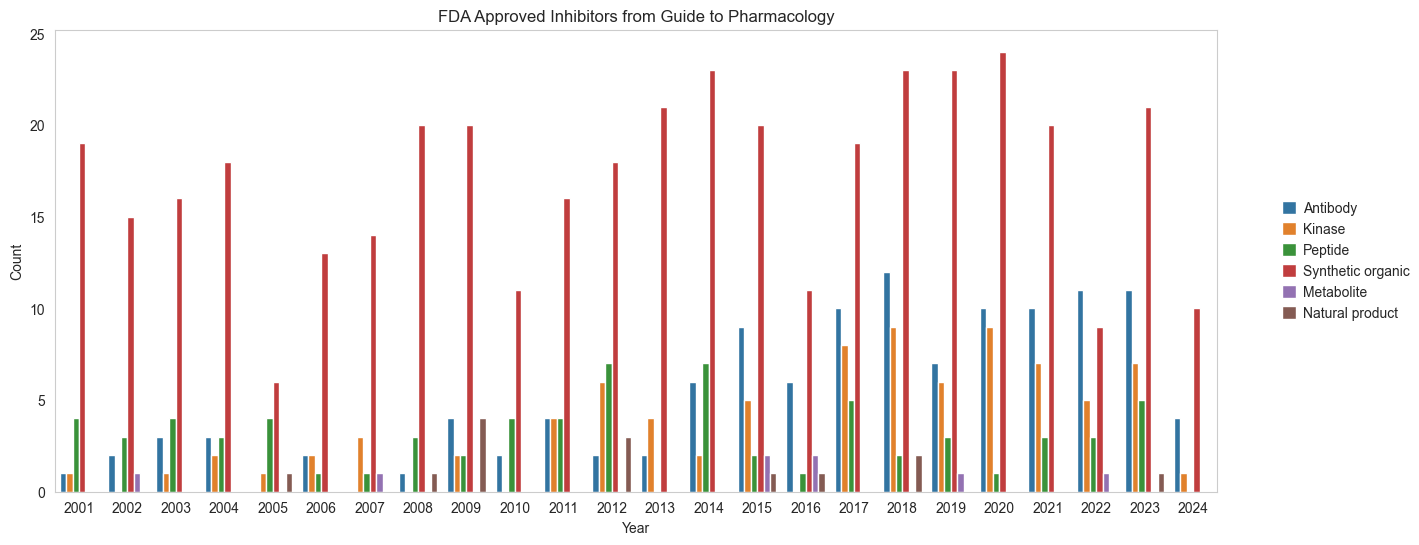

In [6]:
title = 'FDA Approved Inhibitors from Guide to Pharmacology'
plot_data.bar(figsize=(15,6), legend_loc='out right center', title=title)

<Axes: title={'center': 'FDA Approved Inhibitors from Guide to Pharmacology'}, xlabel='Year', ylabel='Count'>

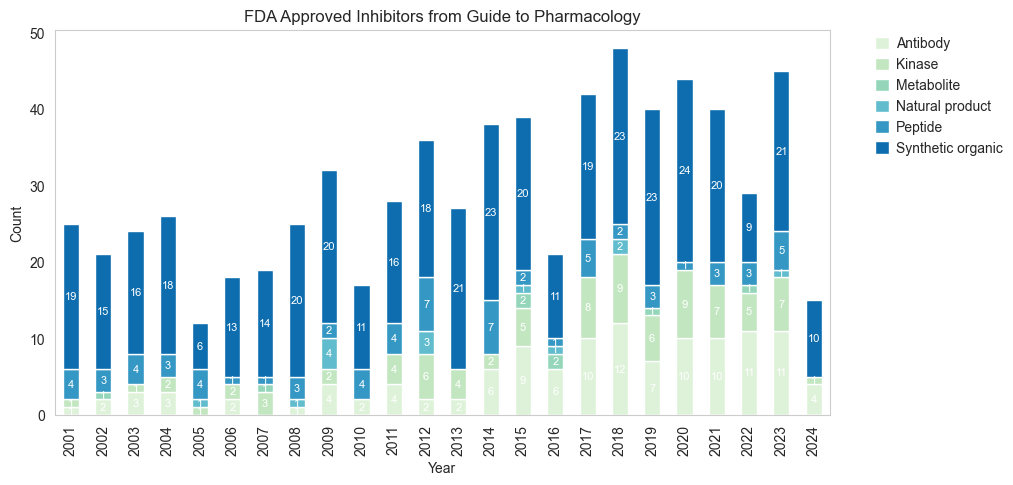

In [13]:
title = 'FDA Approved Inhibitors from Guide to Pharmacology'
plot_data.stacked(legend_loc='out right upper', color_palette='GnBu', title=title)
# savepath='/Users/tonyelin/Downloads/test.png'

Access the attribute from the Plot() class. 


In [8]:
year_data = plot_data.df
year = year_data[year_data['Year'] == 2009].reset_index(drop=True)
year

,type,Year,Count
0,Antibody,2009,4
1,Kinase,2009,2
2,Natural product,2009,4
3,Peptide,2009,2
4,Synthetic organic,2009,20


In [9]:
title = 'FDA Approved Inhibitors from Guide to Pharmacology (2009)'
plot_data.donut(year, title=title, savepath='/Users/tonyelin/Downloads/pie.png', color_palette='GnBu', legend_loc='out right center')